In [69]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from skimage.morphology import erosion
# from skimage.filters import sobel
# from skimage.segmentation import active_contour

# def im2double(im):
#     return im.astype(np.float64) / np.iinfo(im.dtype).max

# def daugman_operator(image, rmin, rmax):
#     print("Applying optimized Daugman’s integrodifferential operator...")
#     rows, cols = image.shape
#     gradient_image = sobel(image)
#     max_gradient = 0
#     best_center = (0, 0)
#     best_radius = 0
    
#     for r in range(rmin, rmax):
#         y, x = np.where(cv2.Canny((image * 255).astype(np.uint8), 50, 150) > 0)  # Edge detection for faster processing
#         for i in range(len(x)):
#             mask = np.zeros_like(image, dtype=np.uint8)
#             cv2.circle(mask, (x[i], y[i]), r, 1, thickness=1)
#             gradient = np.sum(gradient_image * mask)
#             if gradient > max_gradient:
#                 max_gradient = gradient
#                 best_center = (y[i], x[i])
#                 best_radius = r
    
#     print(f"Detected pupil center: {best_center}, radius: {best_radius}")
#     return best_center, best_radius

# def drawcircle(image, center, radius):
#     print(f"Drawing circle at {center} with radius {radius}")
#     output = image.copy()
#     cv2.circle(output, (int(center[1]), int(center[0])), int(radius), (255, 0, 0), 2)
#     return output

# def apply_active_contour(image, init_snake):
#     print("Applying Active Contour Model...")
#     snake = active_contour(image, init_snake, alpha=0.01, beta=0.1, gamma=0.1)
#     print("Active Contour Model applied successfully.")
#     return snake

# def irisSeg(filename, rmin, rmax, view_output=False):
#     print("Loading image...")
#     image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
#     image = im2double(image)
#     image = erosion(image)
    
#     plt.figure()
#     plt.imshow(image, cmap='gray')
#     plt.title('Initial Grayscale Image')
#     plt.show()
#     print("Initial image preprocessing completed.")
    
#     # Applying Daugman’s integrodifferential operator
#     (x, y), pupil_radius = daugman_operator(image, rmin, rmax)
#     iris_radius = pupil_radius * 2  # Approximation
    
#     segmented_img = drawcircle(image, (x, y), iris_radius)
#     segmented_img = drawcircle(segmented_img, (x, y), pupil_radius)
    
#     plt.figure()
#     plt.imshow(segmented_img, cmap='gray')
#     plt.title('Daugman Operator - Detected Boundaries')
#     plt.show()
#     print("Daugman Operator applied and boundaries detected.")
    
#     # Applying Active Contour Model
#     s = np.linspace(0, 2 * np.pi, 100)
#     init_snake = np.array([x + iris_radius * np.cos(s), y + iris_radius * np.sin(s)]).T
#     snake = apply_active_contour(image, init_snake)
    
#     plt.figure()
#     plt.imshow(segmented_img, cmap='gray')
#     plt.plot(snake[:, 1], snake[:, 0], '-r', lw=2)
#     plt.title('Active Contour Segmentation')
#     plt.show()
#     print("Active Contour Segmentation completed.")
    
#     return (x, y, iris_radius), (x, y, pupil_radius), segmented_img

# if __name__ == '__main__':
#     print("Starting Iris Segmentation...")
#     coord_iris, coord_pupil, output_image = irisSeg('eye.png', 40, 70, view_output=True)
#     print("Iris Segmentation Completed.")
#     print("Iris Coordinates:", coord_iris)
#     print("Pupil Coordinates:", coord_pupil)


In [70]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage.color import rgb2gray
# from skimage.filters import gaussian
# from skimage.segmentation import active_contour
# from skimage.draw import circle_perimeter

# def preprocess_image(image_path):
#     """Load and convert image to grayscale if needed."""
#     image = cv2.imread(image_path)
#     if image is None:
#         raise ValueError("Image not found or invalid format.")
    
#     if len(image.shape) == 3:  # RGB Image
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Show the original image
#     plt.imshow(image, cmap='gray')
#     plt.title("Original Image")
#     plt.show()
#     return image

# def detect_edges(image):
#     """Apply Gaussian blur and Canny edge detection."""
#     blurred = gaussian(image, sigma=1)
#     # Show the blurred image
#     plt.imshow(blurred, cmap='gray')
#     plt.title("Blurred Image")
#     plt.show()
#     edges = cv2.Canny((blurred * 255).astype(np.uint8), 50, 100)
#     # Show the edges detected
#     plt.imshow(edges, cmap='gray')
#     plt.title("Detected Edges")
#     plt.show()
#     return edges

# def find_initial_contour(edges):
#     """Find an approximate circular boundary for the iris using Hough Transform."""
#     circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20,
#                                param1=50, param2=30, minRadius=30, maxRadius=100)
#     if circles is not None:
#         circles = np.uint16(np.around(circles))
#         return circles[0, 0]  # Return the first detected circle (x, y, radius)
#     return None

# def refine_contour(image, initial_contour):
#     """Refine the iris boundary using active contours (snakes)."""
#     x, y, r = initial_contour
#     theta = np.linspace(0, 2 * np.pi, 100)
#     x_init = x + r * np.cos(theta)
#     y_init = y + r * np.sin(theta)
#     init = np.array([x_init, y_init]).T
    
#     refined = active_contour(gaussian(image, 3), init, alpha=0.01, beta=0.1, gamma=0.01)
#     return refined

# def visualize_results(image, edges, refined_contour):
#     """Display original image, edges, and refined contour."""
#     fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#     ax[0].imshow(image, cmap='gray')
#     ax[0].set_title("Original Image with Detected Edges")
#     ax[0].imshow(edges, cmap='jet', alpha=0.5)
    
#     ax[1].imshow(image, cmap='gray')
#     ax[1].plot(refined_contour[:, 0], refined_contour[:, 1], '-r', lw=2)
#     ax[1].set_title("Refined Iris Contour")
    
#     plt.show()

# def main():
#     image_path = "eye.png"
#     image = preprocess_image(image_path)
#     edges = detect_edges(image)
#     initial_contour = find_initial_contour(edges)
    
#     if initial_contour is not None:
#         refined_contour = refine_contour(image, initial_contour)
#         visualize_results(image, edges, refined_contour)
#     else:
#         print("No circular boundary detected for iris.")

# if __name__ == "__main__":
#     main()

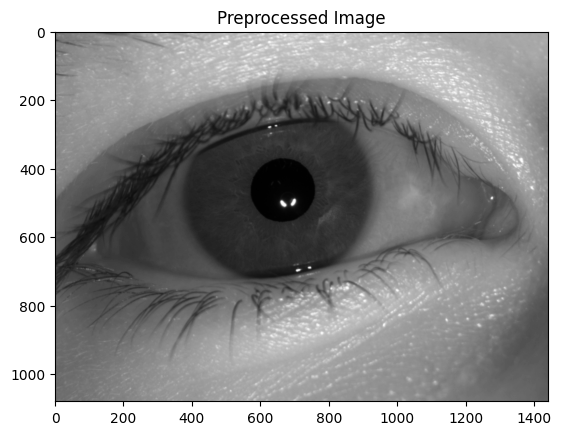

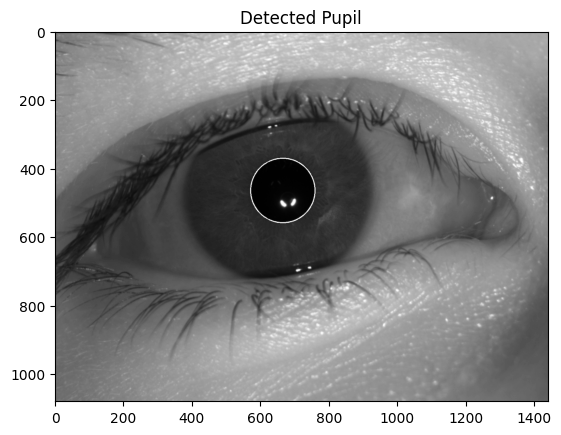

[[759.         465.        ]
 [758.81074759 470.96184845]
 [758.24375241 476.89969064]
 [757.30129754 482.78961697]
 [755.98717793 488.6079108 ]]
[[669.16103234 471.33099204]
 [669.16103247 471.33099228]
 [669.16103259 471.33099251]
 [669.1610327  471.33099272]
 [669.16103281 471.33099291]]


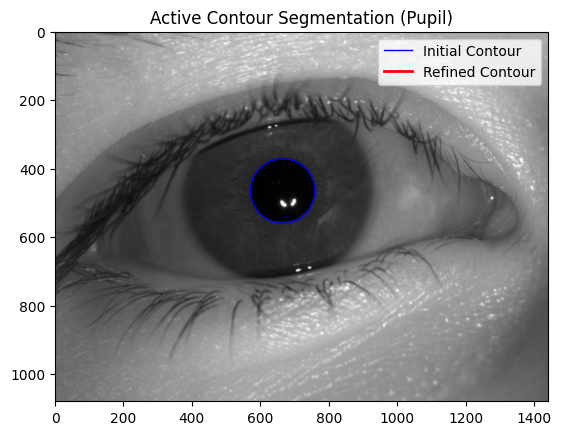

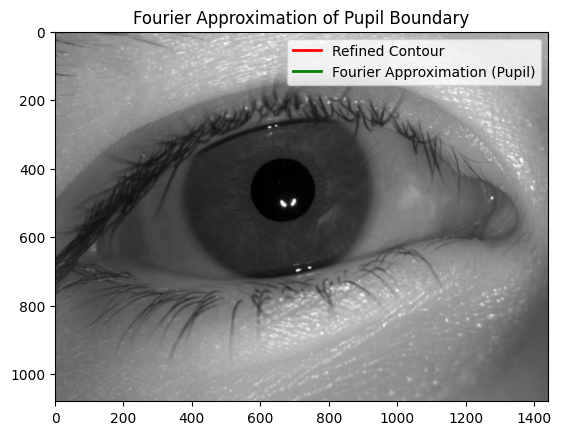

In [71]:
import cv2
import numpy as np
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur
    
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title("Preprocessed Image")
    plt.show()
    
    return image

# Step 2: Detect Pupil Using Hough Transform
def detect_pupil(image):
    circles = cv2.HoughCircles(
        image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
        param1=50, param2=25, minRadius=30, maxRadius=120
    )
    
    output = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))[0]  # Get first detected circle
        pupil = circles[0]  # Only detect pupil
        x, y, r = pupil
        cv2.circle(output, (x, y), r, (255, 0, 0), 2)
        
        plt.figure()
        plt.imshow(output, cmap='gray')
        plt.title("Detected Pupil")
        plt.show()
        
        return pupil
    return None

# Step 3: Apply Active Contour Model
def refine_contour(image, pupil):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = pupil[0] + pupil[2] * np.cos(theta)
    y = pupil[1] + pupil[2] * np.sin(theta)
    initial_contour = np.array([x, y]).T
    print(initial_contour[:5])
    
    snake = active_contour(
        gaussian(image, 3), initial_contour,
        alpha=0.015, beta=10, gamma=0.001
    )
    print(snake[:5])
    
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.plot(initial_contour[:, 0], initial_contour[:, 1], 'b', linewidth=1, label="Initial Contour")
    plt.plot(snake[:, 0], snake[:, 1], 'r', linewidth=2, label="Refined Contour")
    plt.legend()
    plt.title("Active Contour Segmentation (Pupil)")
    plt.show()
    
    return snake

# Step 4: Fourier Series Approximation
def fourier_approximation(image, contour, M=10):
    N = len(contour)
    theta = np.linspace(0, 2 * np.pi, N)
    center = np.mean(contour, axis=0)
    r = np.linalg.norm(contour - center, axis=1)
    
    C_k = np.fft.fft(r) / N  # Compute Fourier coefficients
    C_k[M:] = 0  # Zero out higher frequencies
    r_approx = np.fft.ifft(C_k * N).real  # Reconstruct with M terms
    
    x_approx = r_approx * np.cos(theta) + center[0]
    y_approx = r_approx * np.sin(theta) + center[1]
    approx_contour = np.column_stack((x_approx, y_approx))
    
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.plot(contour[:, 0], contour[:, 1], 'r', linewidth=2, label="Refined Contour")
    plt.plot(approx_contour[:, 0], approx_contour[:, 1], 'g', linewidth=2, label="Fourier Approximation (Pupil)")
    plt.legend()
    plt.title("Fourier Approximation of Pupil Boundary")
    plt.show()
    
    return approx_contour

# Main Execution
def main(image_path):
    image = preprocess_image(image_path)
    pupil = detect_pupil(image)
    
    if pupil is not None:
        refined_contour = refine_contour(image, pupil)
        fourier_contour = fourier_approximation(image, refined_contour, M=10)
    else:
        print("Failed to detect pupil.")

# Run with a sample image
# main("iris_image.jpg")


main("eye.png")